In [135]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('Solarizedl')

# Zomato Dataset Details

#### Consider only Indian restaurants in this analysis -

# 1.

#### 1. )--->

No. of restaurants present in :-
Delhi NCR :  7947
Rest of India :  705


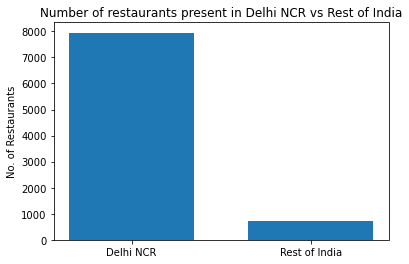

In [1]:
import requests
import matplotlib.pyplot as plt
import pandas as pd

pd_data = pd.read_csv("Files/zomato.csv", encoding="ansi")
df = pd_data.copy()
df_ncr = df[ df.City.isin(["New Delhi", "Ghaziabad", "Noida", "Gurgaon", "Faridabad"]) ]
df_ncr.reset_index(inplace=True, drop=True)
df_roi = df[df['Country Code'] == 1]
df_roi = df_roi[df_roi.City != "New Delhi"]
df_roi = df_roi[df_roi.City != "Ghaziabad"]
df_roi = df_roi[df_roi.City != "Noida"]
df_roi = df_roi[df_roi.City != "Gurgaon"]
df_roi = df_roi[df_roi.City != "Faridabad"]
df_roi.reset_index(inplace=True, drop=True)
# Dataframes of Delhi NCR & Rest of India are now separated in df_ncr and df_roi.

countRoi = 0
for row in df_roi['Restaurant ID']:
    countRoi += 1
countD = 0
for i in df_ncr['Restaurant ID']:
    countD += 1
print("No. of restaurants present in :-")
print("Delhi NCR : ", countD)
print("Rest of India : ", countRoi)
places = ['Delhi NCR', 'Rest of India']
numRes = [countD, countRoi]
plt.bar(places, numRes, width=0.7)
plt.title("Number of restaurants present in Delhi NCR vs Rest of India")
plt.ylabel("No. of Restaurants")
plt.show()

#### 2. )--->

In [2]:
cuisine_ncr = []
for i in df_ncr['Cuisines']:
    row_cuisine = [j for j in i.split(', ')]
    for k in row_cuisine:
        if k not in cuisine_ncr:
            cuisine_ncr.append(k)
cuisine_roi = []
for i in df_roi['Cuisines']:
    row_cuisine = [j for j in i.split(', ')]
    for k in row_cuisine:
        if k not in cuisine_roi:
            cuisine_roi.append(k)
ans = []
bool = False
for i in cuisine_roi:
    if i not in cuisine_ncr:
        ans.append(i)
print("Cuisines which are not present in restaurant of Delhi NCR but present in rest of India :")
print(ans)
# ['BBQ', 'Cajun', 'German', 'Malwani']

Cuisines which are not present in restaurant of Delhi NCR but present in rest of India :
['German', 'Malwani', 'BBQ', 'Cajun']


#### 3. )--->

In [3]:
cuisine_ncr_dict = {}
for i in df_ncr['Cuisines']:
    row_cuisine = [j for j in i.split(', ')]
    for k in row_cuisine:
        if k not in cuisine_ncr_dict:
            cuisine_ncr_dict[k] = 1
        else:
            cuisine_ncr_dict[k] += 1
cuisine_roi_dict = {}
for i in df_roi['Cuisines']:
    row_cuisine = [j for j in i.split(', ')]
    for k in row_cuisine:
        if k not in cuisine_roi_dict:
            cuisine_roi_dict[k] = 1
        else:
            cuisine_roi_dict[k] += 1
print("Top 10 cuisines served by maximum number of restaurants in Delhi NCR :-")
count = 1
top_cuisine_ncr = {}
for i in sorted(cuisine_ncr_dict.items(), key=lambda x: x[1], reverse=True):
    print(count, ". ", i[0], "-", i[1])
    count += 1
    top_cuisine_ncr[i[0]] = i[1]
    if count == 11:
        break
print("\nTop 10 cuisines served by maximum number of restaurants in Rest of India :-")
count = 1
top_cuisine_roi = {}
for i in sorted(cuisine_roi_dict.items(), key=lambda x: x[1], reverse=True):
    print(count, ". ", i[0], "-", i[1])
    count += 1
    top_cuisine_roi[i[0]] = i[1]
    if count == 11:
        break

Top 10 cuisines served by maximum number of restaurants in Delhi NCR :-
1 .  North Indian - 3597
2 .  Chinese - 2448
3 .  Fast Food - 1866
4 .  Mughlai - 933
5 .  Bakery - 697
6 .  South Indian - 569
7 .  Continental - 547
8 .  Desserts - 542
9 .  Street Food - 538
10 .  Italian - 535

Top 10 cuisines served by maximum number of restaurants in Rest of India :-
1 .  North Indian - 349
2 .  Chinese - 242
3 .  Continental - 177
4 .  Italian - 147
5 .  Cafe - 136
6 .  Fast Food - 97
7 .  South Indian - 62
8 .  Mughlai - 59
9 .  Desserts - 55
10 .  Mexican - 50


#### 4. )--->

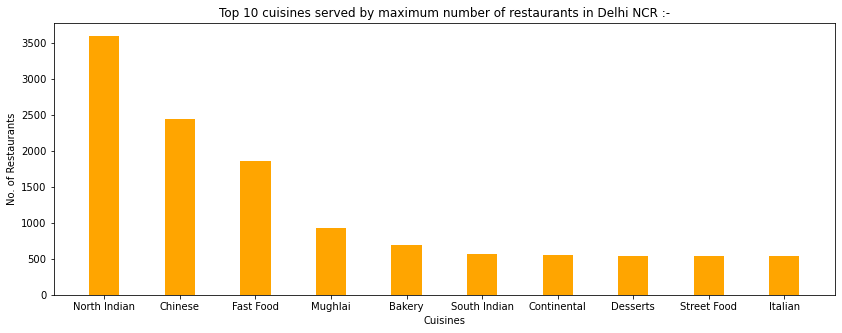

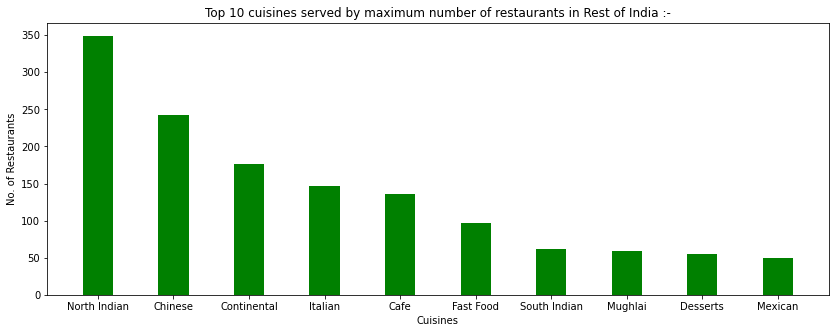


The Cuisine serving distribution ratio is similar in both regional categories, just the cuisines differ :
-> 'North Indian' and 'Chinese' cuisines have higher popularity in both regions.
-> 'South Indian' and 'Deserts' also share similarity in both regions, i.e. almost at bottom of top 10 list,
-> 'Continental' and 'Italian' have higher servings in Rest of India, but not in Delhi NCR region.
-> 'Fast food' and 'Mughlai' have higher servings in Delhi NCR region, but not in Rest of India.
-> 'Bakery' is served in Delhi NCR but not quite often in Rest of India.
-> 'Mexican' is served in Rest of India but not quite often in Delhi NCR.



In [139]:
cuisines_ncr = list(top_cuisine_ncr.keys())
freq_ncr = list(top_cuisine_ncr.values())
plt.figure(figsize = (14, 5))
plt.bar(cuisines_ncr, freq_ncr, color='orange', width=0.4)
plt.xlabel("Cuisines")
plt.ylabel("No. of Restaurants")
plt.title("Top 10 cuisines served by maximum number of restaurants in Delhi NCR :-")
plt.show()

cuisines_roi = list(top_cuisine_roi.keys())
freq_roi = list(top_cuisine_roi.values())
plt.figure(figsize = (14, 5))
plt.bar(cuisines_roi, freq_roi, color='green', width=0.4)
plt.xlabel("Cuisines")
plt.ylabel("No. of Restaurants")
plt.title("Top 10 cuisines served by maximum number of restaurants in Rest of India :-")
plt.show()

print("""
The Cuisine serving distribution ratio is similar in both regional categories, just the cuisines differ :
-> 'North Indian' and 'Chinese' cuisines have higher popularity in both regions.
-> 'South Indian' and 'Deserts' also share similarity in both regions, i.e. almost at bottom of top 10 list,
-> 'Continental' and 'Italian' have higher servings in Rest of India, but not in Delhi NCR region.
-> 'Fast food' and 'Mughlai' have higher servings in Delhi NCR region, but not in Rest of India.
-> 'Bakery' is served in Delhi NCR but not quite often in Rest of India.
-> 'Mexican' is served in Rest of India but not quite often in Delhi NCR.
""")

# 2.

#### 1. )--->

In [5]:
# 0. get 'Aggregate rating' column.

# 1. get 'Votes' column
# 2. count no. from 'Cuisines' column.
# 3. get 'Average Cost' column.
# 4. let's see.
#Sort the table according to ascending order of Restaurant's rating.

9551


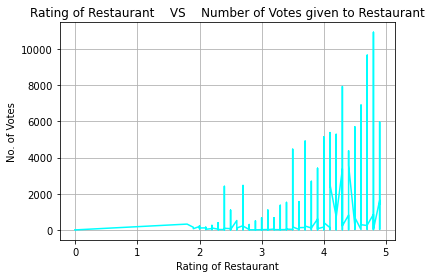

As no. of votes given to a restaurant increases, it's rating also increases, as seen in plot.


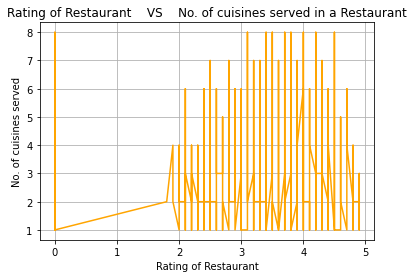

When no. of cuisines served are maximum i.e. about 7 to 9, rating is average, i.e. about 3 to 4.
And when rating of restaurants get at it's peak, no. of cuisines are mostly around 3 to 6.



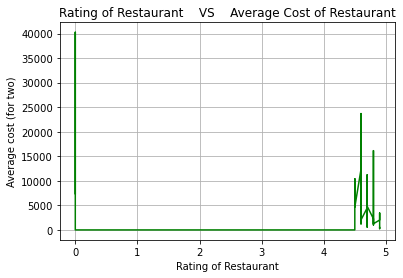

When Average cost is neither too large nor too small, the ratings are good.
Otherwise, when cost is at extremes, the ratings of restaurants are bad.


As different cuisines are served in different regions, so people from different regions will rate a same 
cuisine differntly. So just by knowing cuisines served by a restaurant, you can't predict it's rating.



In [134]:
import requests
import matplotlib.pyplot as plt
import pandas as pd

pd_data = pd.read_csv("Files/zomato.csv", encoding="ansi")
df = pd_data.sort_values(by=['Aggregate rating'] , ascending=True)


cuisine_dict = {}
row_cuisine = []
for i in df['Cuisines']:
    row = [j for j in str(i).split(', ')]
    row_cuisine.append(len(row))
    for k in row:
        if k not in cuisine_dict:
            cuisine_dict[k] = 1
        else:
            cuisine_dict[k] += 1
print(len(row_cuisine))
plt.plot(df['Aggregate rating'], df['Votes'], color='cyan')
plt.ylabel("No. of Votes")    #Y-axis name
plt.xlabel("Rating of Restaurant")    #X-axis name
plt.grid()
plt.title("Rating of Restaurant    VS    Number of Votes given to Restaurant")
plt.show()
print("As no. of votes given to a restaurant increases, it's rating also increases, as seen in plot.")


plt.plot(df['Aggregate rating'], row_cuisine, color='orange')
plt.ylabel("No. of cuisines served")    #Y-axis name
plt.xlabel("Rating of Restaurant")    #X-axis name
plt.grid()
plt.title("Rating of Restaurant    VS    No. of cuisines served in a Restaurant")
plt.show()
print("""When no. of cuisines served are maximum i.e. about 7 to 9, rating is average, i.e. about 3 to 4.
And when rating of restaurants get at it's peak, no. of cuisines are mostly around 3 to 6.
""")


currency = []
for i in df['Currency']:
    if i not in currency:
        currency.append(i)
# Printed the list currency & got the list of different currencies present in the data.
# currency = ['Indian Rupees(Rs.)', 'Dollar($)', 'Pounds(Œ£)', 'Brazilian Real(R$)', 'NewZealand($)', 
       #      'Sri Lankan Rupee(LKR)','Emirati Diram(AED)', 'Qatari Rial(QR)', 'Turkish Lira(TL)', 
       #      'Rand(R)', 'Indonesian Rupiah(IDR)', 'Botswana Pula(P)']
# Now convert all of them to 'Indian Rupees(Rs.)' , to make a relative comparison possible.
# Conversion rates on --> 10/08/2021
cost = []
for i in range(9551):
    if df['Currency'][i] == "Dollar($)":
        rcost = df['Average Cost for two'][i] * 74.41
    elif df['Currency'][i] == "Pounds(Œ£)":
        rcost = df['Average Cost for two'][i] * 103.02
    elif df['Currency'][i] == "Brazilian Real(R$)":
        rcost = df['Average Cost for two'][i] * 14.22
    elif df['Currency'][i] == "NewZealand($)":
        rcost = df['Average Cost for two'][i] * 52.12
    elif df['Currency'][i] == "Sri Lankan Rupee(LKR)":
        rcost = df['Average Cost for two'][i] * 0.37
    elif df['Currency'][i] == "Emirati Diram(AED)":
        rcost = df['Average Cost for two'][i] * 20.27
    elif df['Currency'][i] == "Qatari Rial(QR)":
        rcost = df['Average Cost for two'][i] * 20.44
    elif df['Currency'][i] == "Turkish Lira(TL)":
        rcost = df['Average Cost for two'][i] * 8.60
    elif df['Currency'][i] == "Rand(R)":
        rcost = df['Average Cost for two'][i] * 5.03
    elif df['Currency'][i] == "Indonesian Rupiah(IDR)":
        rcost = df['Average Cost for two'][i] * 0.0052
    elif df['Currency'][i] == "Botswana Pula(P)":
        rcost = df['Average Cost for two'][i] * 6.71
    else:
        rcost = 0
    cost.append(rcost)
plt.plot(df['Aggregate rating'], cost, color='green')
plt.ylabel("Average cost (for two)")    #Y-axis name
plt.xlabel("Rating of Restaurant")    #X-axis name
plt.grid()
plt.title("Rating of Restaurant    VS    Average Cost of Restaurant")
plt.show()
print("""When Average cost is neither too large nor too small, the ratings are good.
Otherwise, when cost is at extremes, the ratings of restaurants are bad.
""")


print("""
As different cuisines are served in different regions, so people from different regions will rate a same 
cuisine differntly. So just by knowing cuisines served by a restaurant, you can't predict it's rating.
""")

#### 2. )--->

In [39]:
total_votes = 0
for i in df['Votes']:
    total_votes += i
weighted_rate = []
for i in range(9551):
    rans = (df['Votes'][i] * df['Aggregate rating'][i]) / total_votes
    weighted_rate.append(rans)
locality_rating_sum = {}
locality_rating_count = {}
for i in range(9551):
    if df['Locality'][i] in locality_rating_sum:
        locality_rating_sum[df['Locality'][i]] += weighted_rate[i]
        locality_rating_count[df['Locality'][i]] += 1
    else:
        locality_rating_sum[df['Locality'][i]] = weighted_rate[i]
        locality_rating_count[df['Locality'][i]] = 1
locality_weighted_rating = {}
j = 0
for i in locality_rating_sum:
    locality_weighted_rating[i] = locality_rating_sum[i]
    locality_weighted_rating[i] /= locality_rating_count[i]

# locality_weighted_rating  -->  has weighted restaurant rating of each locality.

print("Top 10 localities with more weighted restaurant rating :-")
count = 1
for i in sorted(locality_rating_sum.items(), key=lambda x: x[1], reverse=True):
    print(count, ". ", i[0], " - ", i[1])
    count += 1
    if count >= 11:
        break

Top 10 localities with more weighted restaurant rating :-
1 .  Connaught Place  -  0.3291606084162694
2 .  Cyber Hub, DLF Cyber City  -  0.09305559355284274
3 .  Hauz Khas Village  -  0.08553740211991501
4 .  Khan Market  -  0.07649016278037828
5 .  Rajouri Garden  -  0.06772137497539445
6 .  Indiranagar  -  0.060105094935758635
7 .  Sector 29  -  0.0563167394546407
8 .  Park Street Area  -  0.05270861344748089
9 .  Sector 18  -  0.05226474582039108
10 .  Delhi University-GTB Nagar  -  0.05139489338702628


# 3. Visualization

#### 1. )--->

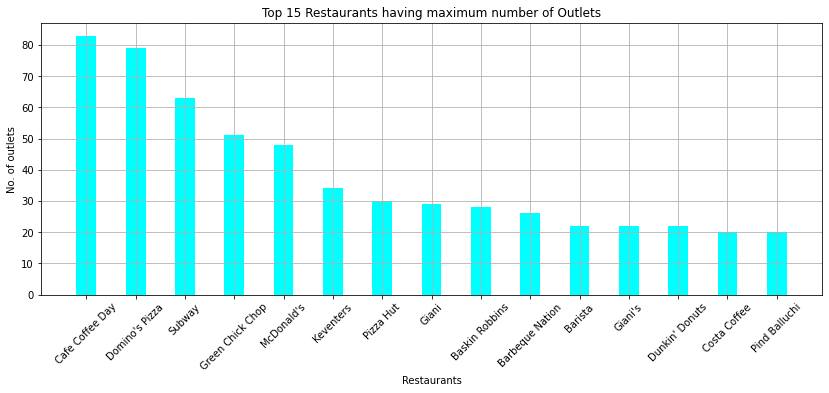

In [55]:
outlets = {}
for i in df['Restaurant Name']:
    if i in outlets:
        outlets[i] += 1
    else:
        outlets[i] = 1
top_outlets = {}
count = 1
for i in sorted(outlets.items() , key=lambda x: x[1] , reverse = True):
    top_outlets[i[0]] = i[1]
    count += 1
    if count >= 16:
        break
x_outlets = []
y_outlets = []
for i in top_outlets:
    x_outlets.append(i)
    y_outlets.append(top_outlets[i])
plt.figure(figsize = (14,5))
plt.bar(x_outlets, y_outlets, color='cyan', width=0.4)
plt.grid()
plt.xticks(rotation=45)
plt.xlabel("Restaurants")
plt.ylabel("No. of outlets")
plt.title("Top 15 Restaurants having maximum number of Outlets")
plt.show()

#### 2. )--->

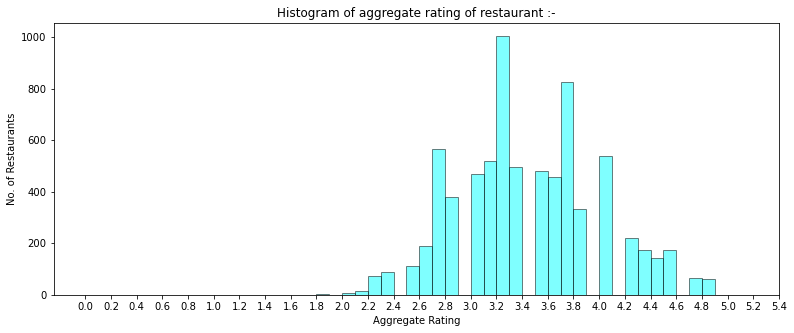

In [136]:
import numpy as np

df_rating = df['Aggregate rating'][df['Rating text'] != 'Not rated']
bin_num = np.arange(0,5,0.1)
plt.figure(figsize=(13,5))
plt.hist(df_rating, bins=bin_num, color='cyan', edgecolor='black', alpha=0.5)
#plt.grid()
xt = np.arange(0, 5.5, 0.2)
plt.xticks(xt)
plt.xlabel("Aggregate Rating")
plt.ylabel("No. of Restaurants")
plt.title("Histogram of aggregate rating of restaurant :-")
plt.show()

#### 3. )--->

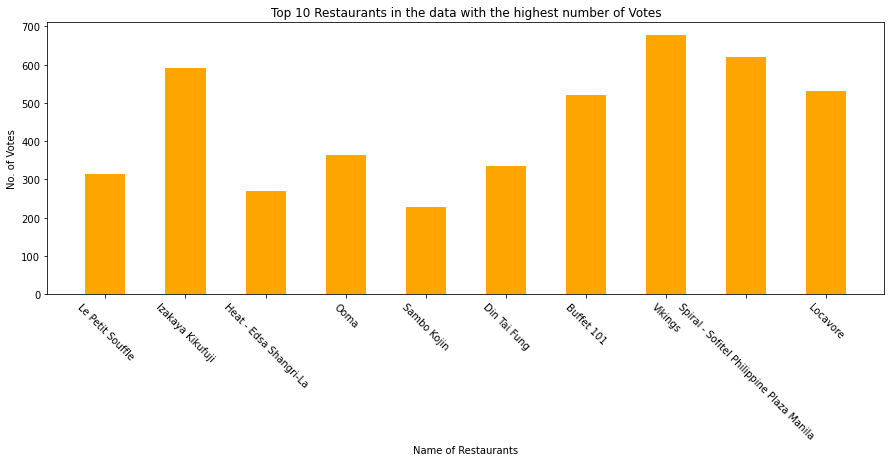

In [100]:
pd_data = pd.read_csv("Files/zomato.csv", encoding="ansi")
df = pd_data.sort_values(by=['Votes'] , ascending=True)
top_names = []
top_votes = []
for i in range(10):
    top_names.append(df['Restaurant Name'][i])
    top_votes.append(df['Votes'][i])
plt.figure(figsize = (15,5))
plt.bar(top_names, top_votes, color='orange', width=0.5)
plt.xticks(rotation=-45)
plt.ylabel("No. of Votes")
plt.xlabel("Name of Restaurants")
plt.title("Top 10 Restaurants in the data with the highest number of Votes")
plt.show()

#### 4. )--->

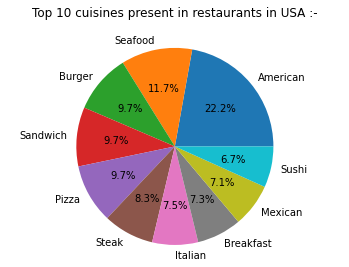

In [111]:
df_usa = df[df['Country Code'] == 216]
cuisine_usa_dict = {}
for i in df_usa['Cuisines']:
    row_cuisine = [j for j in str(i).split(', ')]
    for k in row_cuisine:
        if k not in cuisine_usa_dict:
            cuisine_usa_dict[k] = 1
        else:
            cuisine_usa_dict[k] += 1
count = 1
top_cuisine_name = []
top_cuisine_count = []
for i in sorted(cuisine_usa_dict.items(), key=lambda x: x[1], reverse=True):
    count += 1
    top_cuisine_name.append(i[0])
    top_cuisine_count.append(i[1])
    if count == 11:
        break
plt.pie(top_cuisine_count, labels=top_cuisine_name, autopct="%.1f%%")
plt.axis("equal")
plt.title("Top 10 cuisines present in restaurants in USA :-\n")
plt.show()

#### 5. )--->

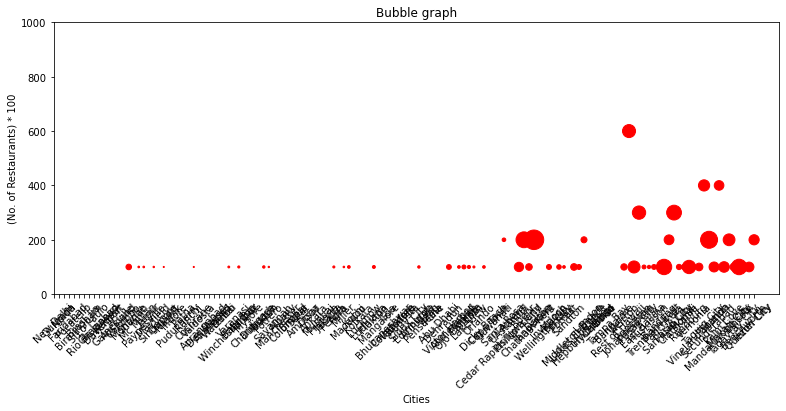

In [138]:
total_votes = 0
for i in df['Votes']:
    total_votes += i
weighted_rate = []
for i in range(9551):
    rans = (df['Votes'][i] * df['Aggregate rating'][i]) / total_votes
    weighted_rate.append(rans)
city_rating_sum = {}
city_rating_count = {}
for i in range(9551):
    if df['City'][i] in city_rating_sum:
        city_rating_sum[df['City'][i]] += weighted_rate[i]
        city_rating_count[df['City'][i]] += 1
    else:
        city_rating_sum[df['City'][i]] = weighted_rate[i]
        city_rating_count[df['City'][i]] = 1
city_weighted_rating = {}
j = 0
for i in city_rating_sum:
    city_weighted_rating[i] = city_rating_sum[i]
    city_weighted_rating[i] /= city_rating_count[i]
    
city_number = {}
for i in df['City']:
    if i in city_number:
        city_number[i] += 1
    else:
        city_number[i] = 1
cities = []
num_res = []
city_rate = []
for i in city_number:
    cities.append(i)
    num_res.append(city_number[i]*100)  #No. of Restaurants multiplied by 100 to improve visual experience.
    city_rate.append(city_weighted_rating[i]*100000)  #Rating multiplied by 1 lakh, to make bubble visible.
plt.figure(figsize=(13,5))
plt.scatter(cities, num_res, city_rate, 'r')  # City_rate as Bubble-size
plt.axis([0,145,0,1000])    # specifying axis-dimensions
plt.xticks(rotation=45)  # as there are many cities in India, so there names are not visible in graph.
plt.xlabel("Cities")
plt.ylabel("(No. of Restaurants) * 100")
plt.title("Bubble graph")
plt.show()